In [92]:
from api_key import *
import numpy as np
import pandas as pd
import json
import os
import time
import networkx as nx
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import community
import matplotlib.cm as mcm
%matplotlib inline

In [2]:
from pyechonest import config
#config.ECHO_NEST_API_KEY = api_key_1
config.ECHO_NEST_API_KEY = api_key_2
#config.ECHO_NEST_API_KEY = api_key_3

In [3]:
from pyechonest import artist 

### Get the Top 1000 hottest singer

In [4]:
star = '*'*10
hot1000_artist = artist.top_hottt(0, 1000)
singer_list = []
hottt_list = []
for i in range(len(hot1000_artist)):
    print('{0} {1} {2}'.format(star, i+1, star)) 
    if (i+1)%60==0:
        time.sleep(30)
    singer_list.append(hot1000_artist[i].name)
    hottt_list.append(hot1000_artist[i].hotttnesss)

********** 1 **********
********** 2 **********
********** 3 **********
********** 4 **********
********** 5 **********
********** 6 **********
********** 7 **********
********** 8 **********
********** 9 **********
********** 10 **********
********** 11 **********
********** 12 **********
********** 13 **********
********** 14 **********
********** 15 **********
********** 16 **********
********** 17 **********
********** 18 **********
********** 19 **********
********** 20 **********
********** 21 **********
********** 22 **********
********** 23 **********
********** 24 **********
********** 25 **********
********** 26 **********
********** 27 **********
********** 28 **********
********** 29 **********
********** 30 **********
********** 31 **********
********** 32 **********
********** 33 **********
********** 34 **********
********** 35 **********
********** 36 **********
********** 37 **********
********** 38 **********
********** 39 **********
********** 40 **********
*********

In [5]:
data = pd.DataFrame({'artist':singer_list,
                    'hotttnesss':hottt_list})
data.to_csv('top1000.csv',encoding="utf-8",index=False) 

### Build Up the Adjacency Matrix

In [6]:
singer_pd = pd.read_csv('top1000.csv', encoding="utf-8")
singer_list = singer_pd.artist

In [7]:
ln = len(singer_list)
singer_edge = pd.DataFrame(np.zeros(ln**2).reshape(ln,ln))

In [ ]:
for i in range(ln):
    sim_list = [singer.name for singer in artist.Artist(singer_pd.iloc[i]['artist']).similar[:30]]
    for j in range(ln):
        if (i!=j)and(singer_pd.iloc[j]['artist'] in sim_list):
            singer_edge.iloc[i][j] = 1
    if ((i+1)%40==0):
        time.sleep(60)
    print('{0} {1}|{2} {3}'.encode("iso-8859-9").format(star, i+1, artist.Artist(singer_pd.iloc[i]['artist']), star))

In [ ]:
singer_edge.to_csv("total_artist_edge.csv",encoding="utf-8",index=True)

### Set Up the Directed Graph of all 1000 Singer

In [8]:
singer_edge = pd.read_csv("total_artist_edge.csv",encoding="utf-8",index_col='index')
singer_edge.head()

0  1  2  3  4  5  6  7  8  9 ...   990  991  992  993  994  995  996  \
index                               ...                                       
0      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
3      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   

       997  998  999  
index                 
0        0    0    0  
1        0    0    0  
2        0    0    0  
3        0    0    0  
4        0    0    0  

[5 rows x 1000 columns]

In [9]:
singer_edge.index=list(singer_list)
singer_edge.columns=list(singer_list)
singer_edge.head()

Adele  Coldplay  Justin Bieber  Calvin Harris  Taylor Swift  \
Adele              0         0              0              0             0   
Coldplay           0         0              0              0             0   
Justin Bieber      0         0              0              0             0   
Calvin Harris      0         0              0              0             0   
Taylor Swift       0         0              0              0             0   

               Ellie Goulding  One Direction  The Weeknd  Drake  Ed Sheeran  \
Adele                       0              0           0      0           0   
Coldplay                    0              0           0      0           0   
Justin Bieber               0              0           0      0           0   
Calvin Harris               0              0           0      0           0   
Taylor Swift                0              0           0      0           0   

                 ...      Jadakiss  Jencarlos Canela  Glass Animals  \
Adele            ...             0                 0              0   
Coldplay         ...             0                 0              0   
Justin Bieber    ...             0                 0              0   
Calvin Harris    ...             0                 0              0   
Taylor Swift     ...             0                 0              0   

               Larry Hernandez  JW  Joey Montana  White Noise  Billie Holiday  \
Adele                        0   0             0            0               0   
Coldplay                     0   0             0            0               0   
Justin Bieber                0   0             0            0               0   
Calvin Harris                0   0             0            0               0   
Taylor Swift                 0   0             0            0               0   

               Stryper  TheFatRat  
Adele                0          0  
Coldplay             0          0  
Justin Bieber        0          0  
Calvin Harris        0          0  
Taylor Swift         0          0  

[5 rows x 1000 columns]

In [10]:
singer_graph = nx.DiGraph()
singer_graph.add_nodes_from(singer_list)

In [11]:
for i in range(ln):
    for j in range(ln):
        if singer_edge.iloc[i][j]==1:
            singer_graph.add_edge(singer_list[i], singer_list[j])

### Visualize the network with artist names as nodes and sizes proportional to artists' hotness

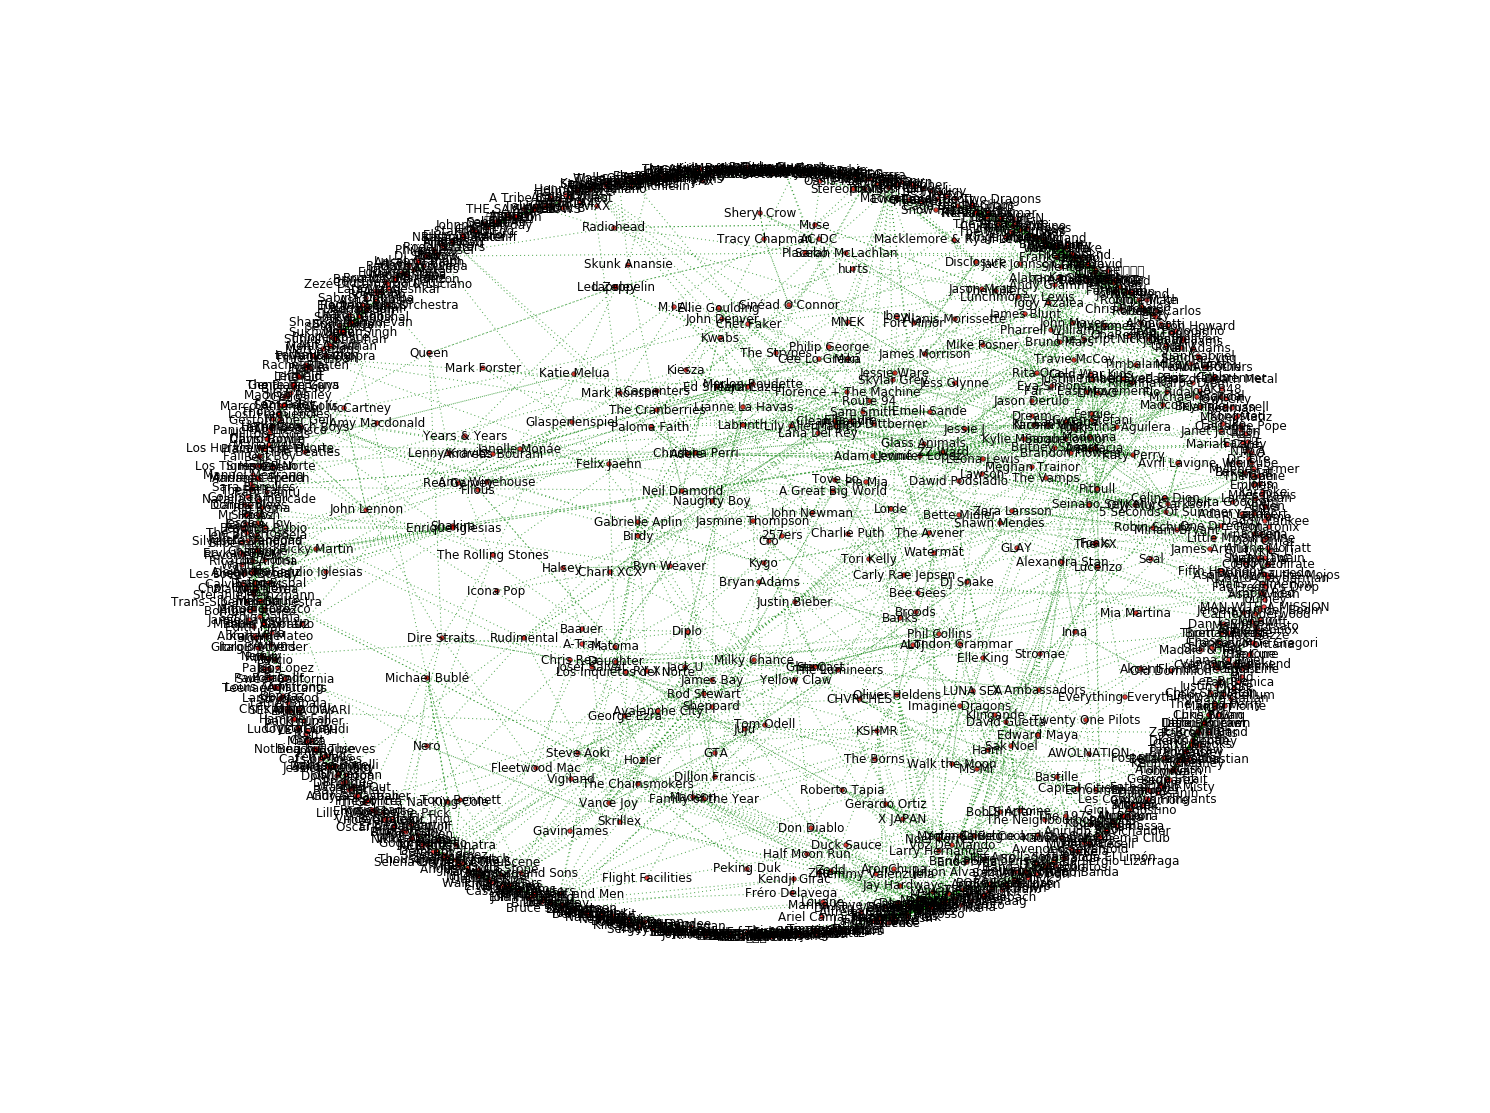

In [15]:
plt.figure(figsize = (20,15))
random.seed(2015)
nx.draw(singer_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green',alpha=0.7)

In [16]:
singer_degree = nx.degree(singer_graph)

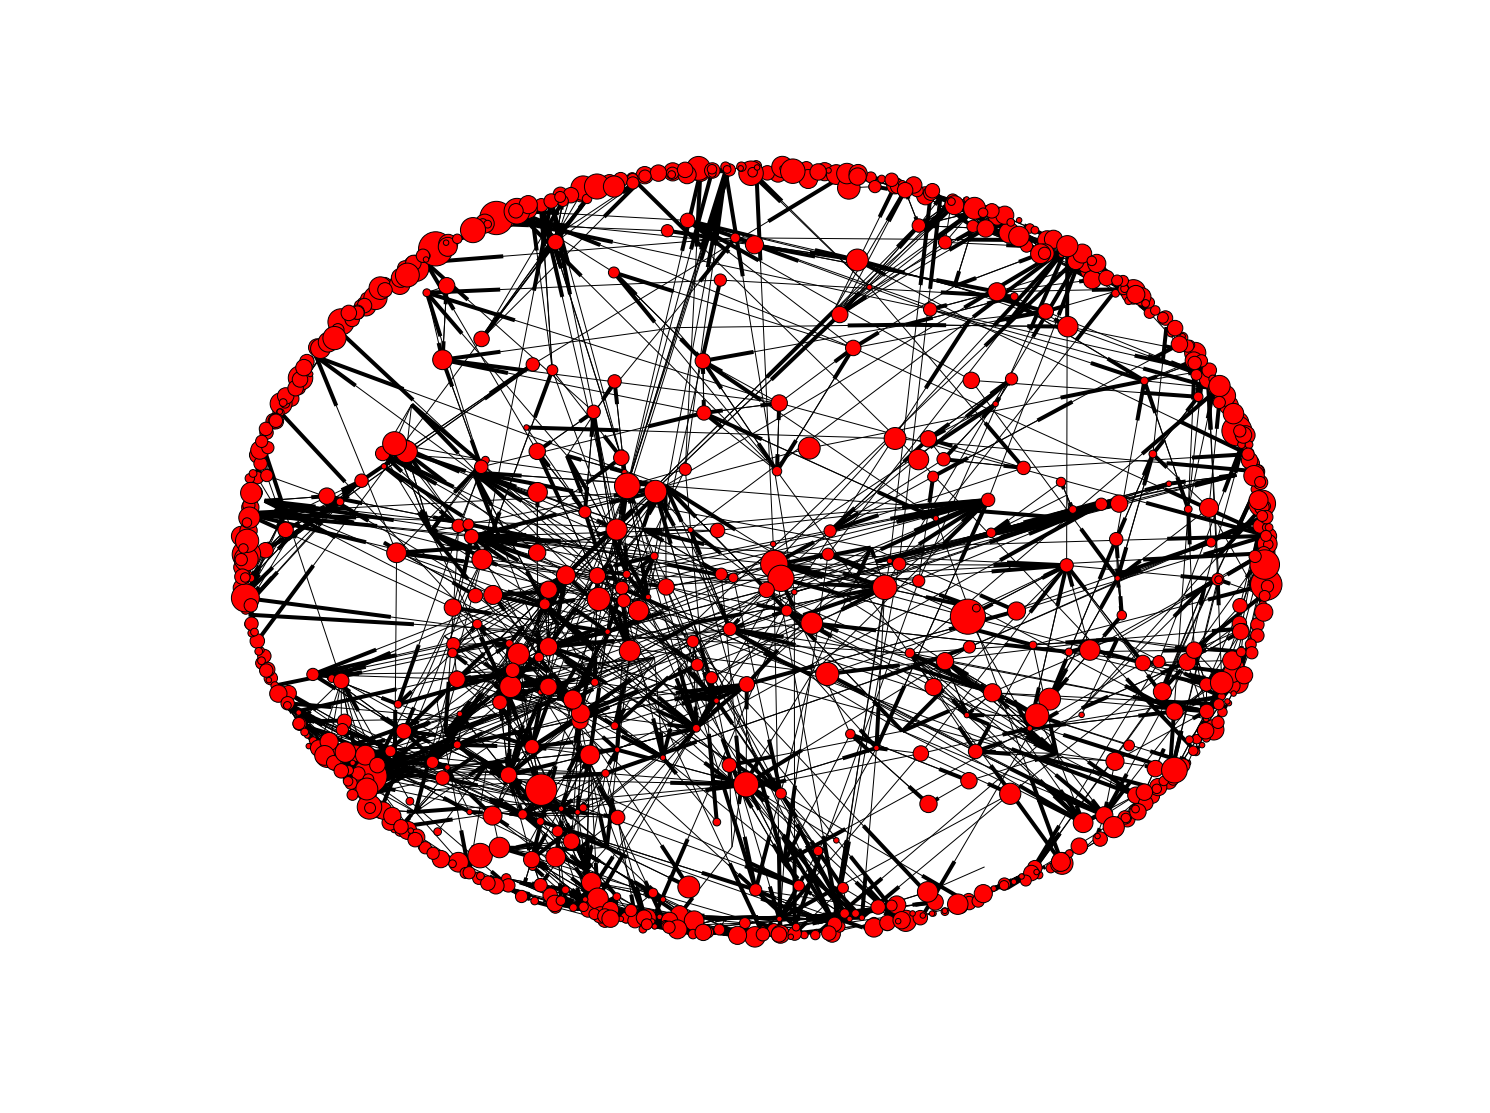

In [17]:
plt.figure(figsize = (20,15))
nx.draw(singer_graph,node_size=30*np.array(singer_degree.values()),with_labels=False,edge_color='black')

### Remove the Nodes with 0 degree

In [53]:
UG = singer_graph
for i in UG.nodes():
    if singer_degree[i]==0:
        UG.remove_node(i)

### Plot the Node whose degree is between(5,10)

In [54]:
rn = random.randint(0,len(new_list))
rn_singer = new_list[rn]
print rn,new_list[rn]
while not(singer_degree[new_list[rn]]) in range(5,10):
    rn = random.randint(0,len(new_list))
    rn_singer = new_list[rn]
    print rn,rn_singer

799 Lykke Li


(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

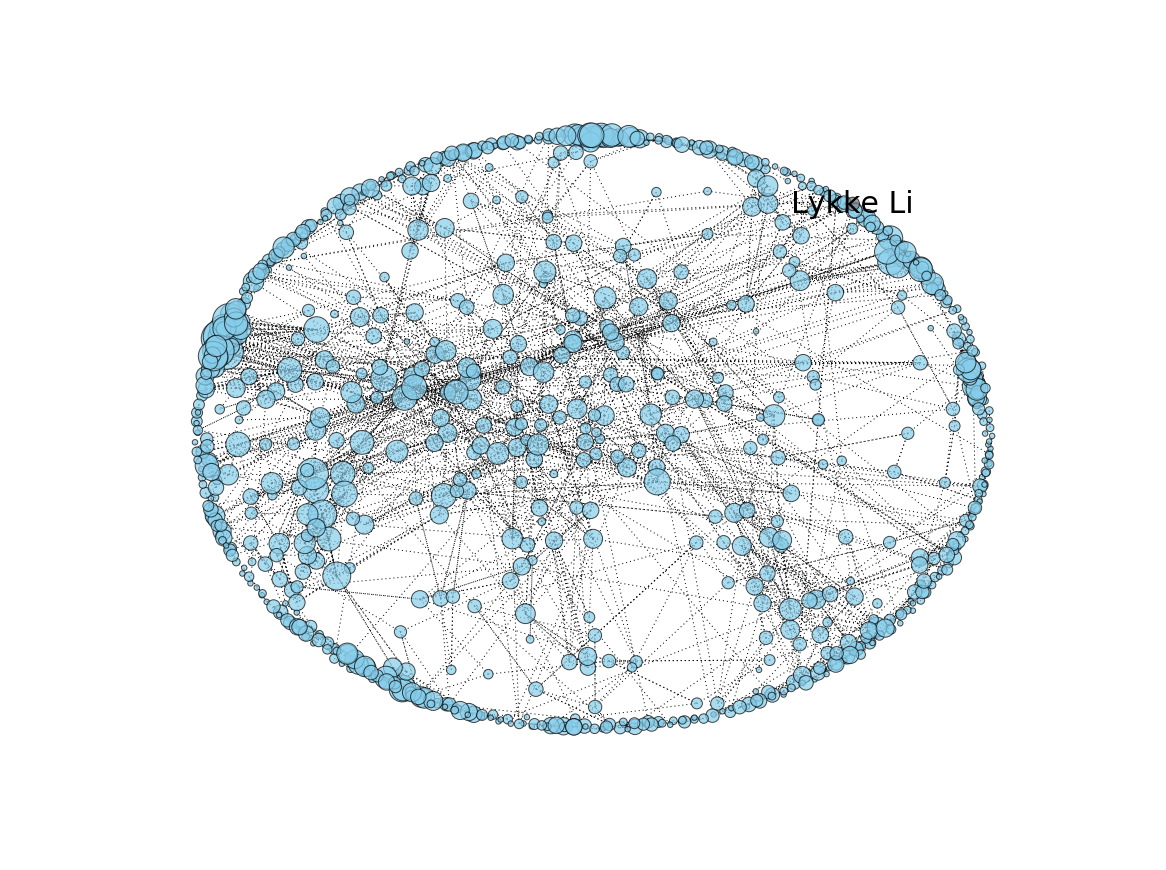

In [55]:
plt.figure(figsize = (20,15))
pos = nx.spring_layout(UG)
random.seed(2015)

color = []
s = []
for i in UG.nodes():
    if i!=rn_singer:
        color.append('Skyblue')
    else:
        color.append('Grey')
for i in UG.nodes():
    s.append(30*singer_degree[i])
nodes = nx.draw_networkx_nodes(UG,pos=pos,with_labels=False,node_size=s,node_color=color,alpha=0.7)
edges = nx.draw_networkx_edges(UG,pos=pos,width=1,edge_color='black',arrows=False,style='dotted')
labels = dict((i, '') for i in new_list)
labels[rn_singer]=rn_singer
nx.draw_networkx_labels(UG,pos,labels,font_size=30,colors='Grey')
plt.axis('off')

### Find artists which are network centers

In [18]:
# output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)  # sort dictionary based on degree values
    for i in range(0,tn):
        print('{0}|{1}:{2}'.decode("iso-8859-9").format(i+1,ind[i],d[ind[i]]))

In [19]:
topdict(singer_degree,10)

1|Swedish House Mafia:41
2|Avicii:40
3|Afrojack:39
4|Hardwell:37
5|Rihanna:33
6|Tiësto:33
7|Alesso:30
8|Kaskade:29
9|Gwen Stefani:27
10|Jennifer Lopez:26


In [20]:
# Eigenvector Centrality
c2= nx.eigenvector_centrality_numpy(singer_graph)
topdict(c2,10)

1|Swedish House Mafia:0.389986251497
2|Avicii:0.378768807535
3|Sebastian Ingrosso:0.363326291606
4|Afrojack:0.354403262859
5|Kaskade:0.298645485528
6|Hardwell:0.292683243767
7|Tiësto:0.283062220298
8|Alesso:0.233475363102
9|Steve Angello:0.198482986219
10|Laidback Luke:0.181464026221


In [21]:
# Katz Centrality
c2= nx.katz_centrality_numpy(singer_graph)
topdict(c2,10)

1|Swedish House Mafia:0.281530194073
2|Avicii:0.272450208692
3|Afrojack:0.256599178896
4|Sebastian Ingrosso:0.243254864952
5|Hardwell:0.217761808812
6|Kaskade:0.212362429281
7|Tiësto:0.210105332621
8|Alesso:0.175156516948
9|Steve Angello:0.141862072833
10|Laidback Luke:0.125394638759


In [29]:
alpha = pd.Series([0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1])

In [30]:
tops = pd.DataFrame()
for i in alpha:
    cp = nx.pagerank(singer_graph,i)
    ind = sorted(cp, key=cp.get, reverse=True)
    for j in range(0,5):
        print('{0}|{1}:{2}'.decode("iso-8859-9").format(j+1,ind[j],cp[ind[j]]))
    print('*'*30)
    top = pd.DataFrame(ind[:5])
    top = top.T
    tops = tops.append(top)

1|Rick Ross:0.010998220039
2|Swedish House Mafia:0.0107358724006
3|Avicii:0.0102087156187
4|Tiësto:0.0093051508104
5|Afrojack:0.00919949598955
******************************
1|Swedish House Mafia:0.0089105486263
2|Avicii:0.0084496511099
3|Rick Ross:0.00834941630105
4|Tiësto:0.007903161846
5|Afrojack:0.00772213910276
******************************
1|Swedish House Mafia:0.00767197063998
2|Avicii:0.00726038746082
3|Tiësto:0.00692049955291
4|Rick Ross:0.00685092698401
5|Afrojack:0.00672968802577
******************************
1|Swedish House Mafia:0.00672499219311
2|Avicii:0.00635401453586
3|Tiësto:0.00614808593442
4|Afrojack:0.00597264559525
5|Rick Ross:0.00584025327032
******************************
1|Swedish House Mafia:0.00531233508027
2|Avicii:0.00500773253626
3|Tiësto:0.00496044411422
4|Rihanna:0.00490755046732
5|Afrojack:0.00483631324398
******************************
1|Swedish House Mafia:0.00427272090451
2|Rihanna:0.00412163831795
3|Tiësto:0.00405942919828
4|Avicii:0.0040225541374

In [31]:
tops = tops.reset_index(drop=True)

In [36]:
df = tops.T
df.columns = alpha
df

0.95                 0.90                 0.85  \
0            Rick Ross  Swedish House Mafia  Swedish House Mafia   
1  Swedish House Mafia               Avicii               Avicii   
2               Avicii            Rick Ross               Tiësto   
3               Tiësto               Tiësto            Rick Ross   
4             Afrojack             Afrojack             Afrojack   

                  0.80                 0.70                 0.60  \
0  Swedish House Mafia  Swedish House Mafia  Swedish House Mafia   
1               Avicii               Avicii              Rihanna   
2               Tiësto               Tiësto               Tiësto   
3             Afrojack              Rihanna               Avicii   
4            Rick Ross             Afrojack             Afrojack   

                  0.50                 0.40                 0.30  \
0  Swedish House Mafia              Rihanna              Rihanna   
1              Rihanna  Swedish House Mafia  Swedish House Mafia   
2               Tiësto               Tiësto               Tiësto   
3             Afrojack             Afrojack             Afrojack   
4               Avicii               Avicii               Avicii   

                  0.20                 0.10  
0              Rihanna              Rihanna  
1               Tiësto               Tiësto  
2  Swedish House Mafia             Afrojack  
3             Afrojack  Swedish House Mafia  
4            Rick Ross            Rick Ross

In [ ]:
dict((i, singer_graph.degree().values().count(i)) for i in singer_graph.degree().values())

### Degree Distribution

In [42]:
#introduce auxiliary function visualizing the degree rank plots
def rankPlot(x,params=[]):
    #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
    #params - power-law fit cut-off
    xs=sorted(x,reverse=True) # sort the sequence in decreasing order
    plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
    plt.title("Centrality rank plot") #plot title
    #axe labels  
    plt.ylabel("Centrality")
    plt.xlabel("rank")
    fp=[]                  
    #lognormal fit
    xl=np.log(x[x>0])
    sigma=np.std(xl)
    mu=np.mean(xl)  
    fp=sigma
    s=np.exp(mu)*stats.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
    plt.loglog(s,'r-',marker='.')  
    plt.show()
    return fp 

In [43]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(np.log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
        xh=1-np.cumsum(xh[:-1])
        xb=xb[:-1]
        plt.ylabel("P(c>=x)")
    else:
        plt.ylabel("p(c=x)")
    plt.loglog(np.exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

In [44]:
#and visualize degree distributions for it
d=np.array(nx.degree(UG).values())

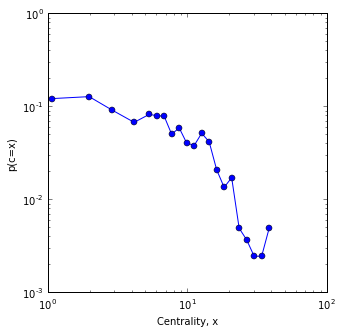

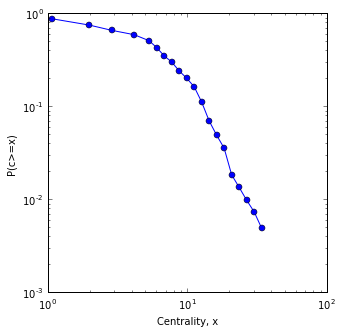

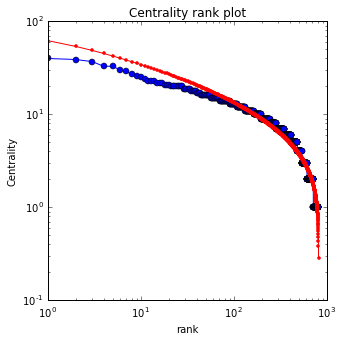

0.87724514095733652

In [45]:
plt.figure(figsize = (5,5))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (5,5))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (5,5))
rankPlot(d,[1])

### Recommendation

* given a artist, find its most similar artists (only one edge away)

In [46]:
# take 'Maroon 5' as an example
selected_artist = ('Maroon 5').encode('utf-8') 
shortest_path = nx.single_source_shortest_path(singer_graph,selected_artist)

In [47]:
similar_artists_list = []
for key, value in shortest_path.iteritems():
    if len(value)==2:
        similar_artists_list.append(key)

In [48]:
print 'Similar artists to {0} are:'.format(selected_artist)
for i in range(0,len(similar_artists_list)):
    a = similar_artists_list[i].encode('utf-8')  # handle wrongly encoded charater
    print ('{0}|{1}').format(i+1,a)

Similar artists to Maroon 5 are:
1|Jason Mraz
2|James Blunt
3|OneRepublic
4|The Script
5|Train
6|Rob Thomas


* Given three random artists, find its most similar artists.

In [49]:
new_list = UG.nodes()

In [50]:
len(new_list)

815

In [51]:
import random
ni = range(1,8)
n = ni[0]

In [57]:
n = ni[0]
rn = random.sample(range(len(new_list)), n)

In [58]:
n = ni[0]
total_mean = [0,0]
for k in range(1000):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    df = pd.Series(shortest_dist.values())
    df = df[df<1000]
    if len(df[:10])!=0:
        mean_dist = np.mean(df[:10])
        mean_hottt = np.mean([float(singer_pd.iloc[j].hotttnesss) for j in df[:10].index])
        total_mean[0] += mean_dist/float(1000)
        total_mean[1] += mean_hottt/float(1000)
total_mean

[5.6504523809523608, 0.74743109704524424]

In [59]:
n = ni[1]
total_mean = [0,0]
for k in range(1000):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    df = pd.Series(shortest_dist.values())
    df = df[df<1000]
    if len(df[:10])!=0:
        mean_dist = np.mean(df[:10])
        mean_hottt = np.mean([float(singer_pd.iloc[j].hotttnesss) for j in df[:10].index])
        total_mean[0] += mean_dist/float(1000)
        total_mean[1] += mean_hottt/float(1000)
total_mean

[9.1444813492063357, 0.83283792970000747]

In [60]:
n = ni[2]
total_mean = [0,0]
for k in range(1000):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    df = pd.Series(shortest_dist.values())
    df = df[df<1000]
    if len(df[:10])!=0:
        mean_dist = np.mean(df[:10])
        mean_hottt = np.mean([float(singer_pd.iloc[j].hotttnesss) for j in df[:10].index])
        total_mean[0] += mean_dist/float(1000)
        total_mean[1] += mean_hottt/float(1000)
total_mean

[12.54802579365079, 0.85305692114762621]

In [61]:
n = ni[3]
total_mean = [0,0]
for k in range(1):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    df = pd.Series(shortest_dist.values())
    df = df[df<1000]
    if len(df[:10])!=0:
        mean_dist = np.mean(df[:10])
        mean_hottt = np.mean([float(singer_pd.iloc[j].hotttnesss) for j in df[:10].index])
        total_mean[0] += mean_dist/float(1000)
        total_mean[1] += mean_hottt/float(1000)
total_mean

[0.023100000000000002, 0.00086582279999999987]

In [62]:
n = ni[4]
total_mean = [0,0]

for k in range(1000):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    mean_dist = np.mean([j[1] for j in sorted_shortest_dist[:10]])
    mean_hottt = np.mean([float(singer_pd[singer_pd.artist==j[0]].hotttnesss) for j in sorted_shortest_dist[:10]])
    total_mean[0] += mean_dist/float(1000)
    total_mean[1] += mean_hottt/float(1000)
total_mean

[5.3834999999999793, 0.74172029859999988]

In [63]:
n = ni[5]
total_mean = [0,0]

for k in range(1000):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    mean_dist = np.mean([j[1] for j in sorted_shortest_dist[:10]])
    mean_hottt = np.mean([float(singer_pd[singer_pd.artist==j[0]].hotttnesss) for j in sorted_shortest_dist[:10]])
    total_mean[0] += mean_dist/float(1000)
    total_mean[1] += mean_hottt/float(1000)
total_mean

[3.0488999999999766, 0.73966688369999889]

In [64]:
n = ni[6]
total_mean = [0,0]

for k in range(1000):

    rn = random.sample(range(len(new_list)), n)
    rn_singer = [new_list[i]  for i in rn]
    shortest_dist= dict()

    for i in new_list:
        shortest_dist[i]=0

    for i in range(n):
        shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
        for j in shortest_path.iterkeys():
            ln = len(shortest_path[j])
            if ln>1:
                shortest_dist[j]+=ln

    for i in new_list:
        if shortest_dist[i]==0:
            shortest_dist[i]=1000*n
    for i in rn_singer:
        shortest_dist[i]=1000*n
    import operator
    sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
    mean_dist = np.mean([j[1] for j in sorted_shortest_dist[:10]])
    mean_hottt = np.mean([float(singer_pd[singer_pd.artist==j[0]].hotttnesss) for j in sorted_shortest_dist[:10]])
    total_mean[0] += mean_dist/float(1000)
    total_mean[1] += mean_hottt/float(1000)
total_mean

[2.7562999999999742, 0.73785118030000085]

In [65]:
recomm = pd.DataFrame({'avg_dist':[5.5497329365079198,9.3500611111111152,12.100526984126988, 16.106284523809549],
                      'avg_hot':[0.73444853720873582,0.83179686865913316,0.85392223723889582, 0.86400011599167259]})

([<matplotlib.axis.XTick at 0x113fcd690>,
 <a list of 4 Text xticklabel objects>)

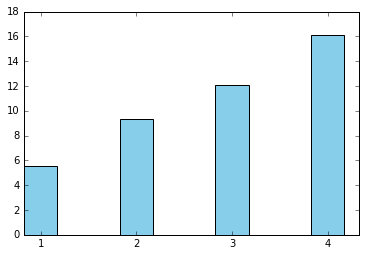

In [66]:
plt.figure()
ind = np.arange(4)
width = 0.35   
p1 = plt.bar(ind, recomm.avg_dist,width,color='Skyblue')

plt.xticks(ind+width/2.0, ('1', '2', '3', '4'))

([<matplotlib.axis.XTick at 0x1160d8450>,
 <a list of 4 Text xticklabel objects>)

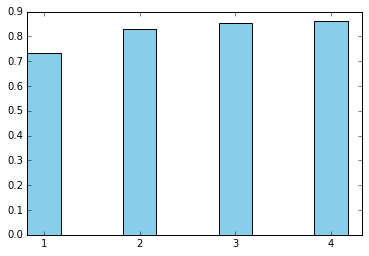

In [67]:
plt.figure()
ind = np.arange(4)
width = 0.35   
p2 = plt.bar(ind, recomm.avg_hot,width,color='Skyblue')

plt.xticks(ind+width/2.0, ('1', '2', '3', '4'))

In [68]:
UG_degree = nx.degree(UG)
hotttnesss = []

In [69]:
for i in UG_degree.keys():
    hotttnesss.append(float(singer_pd[singer_pd.artist==i].hotttnesss))

In [70]:
import statsmodels.api as sm

In [71]:
lm = sm.OLS(np.log(UG_degree.values()), hotttnesss).fit()

In [72]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     2864.
Date:                Sun, 13 Dec 2015   Prob (F-statistic):          8.38e-269
Time:                        22:18:29   Log-Likelihood:                -1025.2
No. Observations:                 815   AIC:                             2052.
Df Residuals:                     814   BIC:                             2057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1645      0.040     53.516      0.0

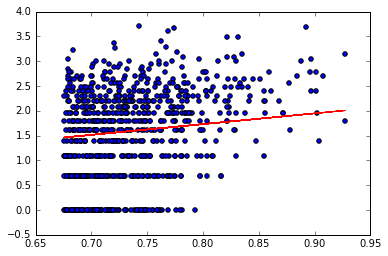

In [73]:
plt.scatter(hotttnesss, np.log(UG_degree.values()))
plt.plot(hotttnesss,lm.predict(hotttnesss),color='red')

### Community Detect

In [74]:
#remove loop edges from a network
def remove_loops(G):
    GU=G
    for n in GU.nodes():
        if GU.has_edge(n,n):
            GU.remove_edge(n,n)
    return GU  

In [75]:
def as_undirected(G):
    GU=nx.Graph()
    for e in G.edges(data=True):
        if GU.has_edge(e[0],e[1]):
            GU[e[0]][e[1]]['weight']=GU[e[0]][e[1]]['weight']+e[2]['weight']
        else:
            GU.add_edge(e[0],e[1],weight=e[2]['weight'])
    nx.set_edge_attributes(GU, 'dist', 0)
    for e in GU.edges(data=True):
        GU[e[0]][e[1]]['dist']=1/float(GU[e[0]][e[1]]['weight'])
    return GU        

In [76]:
#add unit weights to unweighted network nodes
def make_weighted(G):
    WG=G
    for e in WG.edges():
        WG[e[0]][e[1]]['weight']=1
    return WG    

In [77]:
total_artist_graph = make_weighted(singer_graph)

In [78]:
#consider undirected version of the network without loops (for Louvain)
total_artist_graph_noloop = remove_loops(as_undirected(total_artist_graph))

In [79]:
def modularity(G,partition):
    #compute network modularity according to the given partitioning
    nodes=G.nodes()
    #compute node weights and total network weight
    if G.is_directed():
        w1=G.out_degree(weight='weight')
        w2=G.in_degree(weight='weight')
        T=1.0*sum([e[2]['weight'] for e in G.edges(data=True)])
    else:
        w1=G.degree(weight='weight')
        w2=G.degree(weight='weight')
        T=1.0*sum([(1+(e[0]!=e[1]))*e[2]['weight'] for e in G.edges(data=True)])
    M=0 #start accumulating modularity score
    for a in nodes:
        for b in nodes:
            #if (G.is_directed())|(b>=a):
                if partition[a]==partition[b]: #if nodes belong to the same community
                    #get edge weight
                    if G.has_edge(a,b):
                        e=G[a][b]['weight']
                    else:
                        e=0
                    M+=e/T-w1[a]*w2[b]/(T**2) #add modularity score for the considered edge 
    return M                

In [80]:
UG = total_artist_graph_noloop
for i in UG.nodes():
    if total_artist_graph_noloop[i]==0:
        UG.remove_node(i)

In [83]:
#partition Karate Club network using Louvain method
PC = community.best_partition(UG)

In [85]:
modularity(UG,PC)

0.8477207254201911

In [93]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    pos = nx.spring_layout(G)
    plt.figure(figsize = (20,15))
    PN=max(partition.values())
    my_cmap = mcm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n])
    edges = nx.draw_networkx_edges(G,pos=pos,width=1,edge_color='black')
    nodes = nx.draw_networkx_nodes(G,pos=pos,with_labels=False,node_size=250,node_color=c,cmap='Set1')
    labels = list(partition.values())
    nx.draw_networkx_labels(G,pos,partition,font_size=10,colors='')
    plt.axis('off')
#    plt.colorbar(nodes)

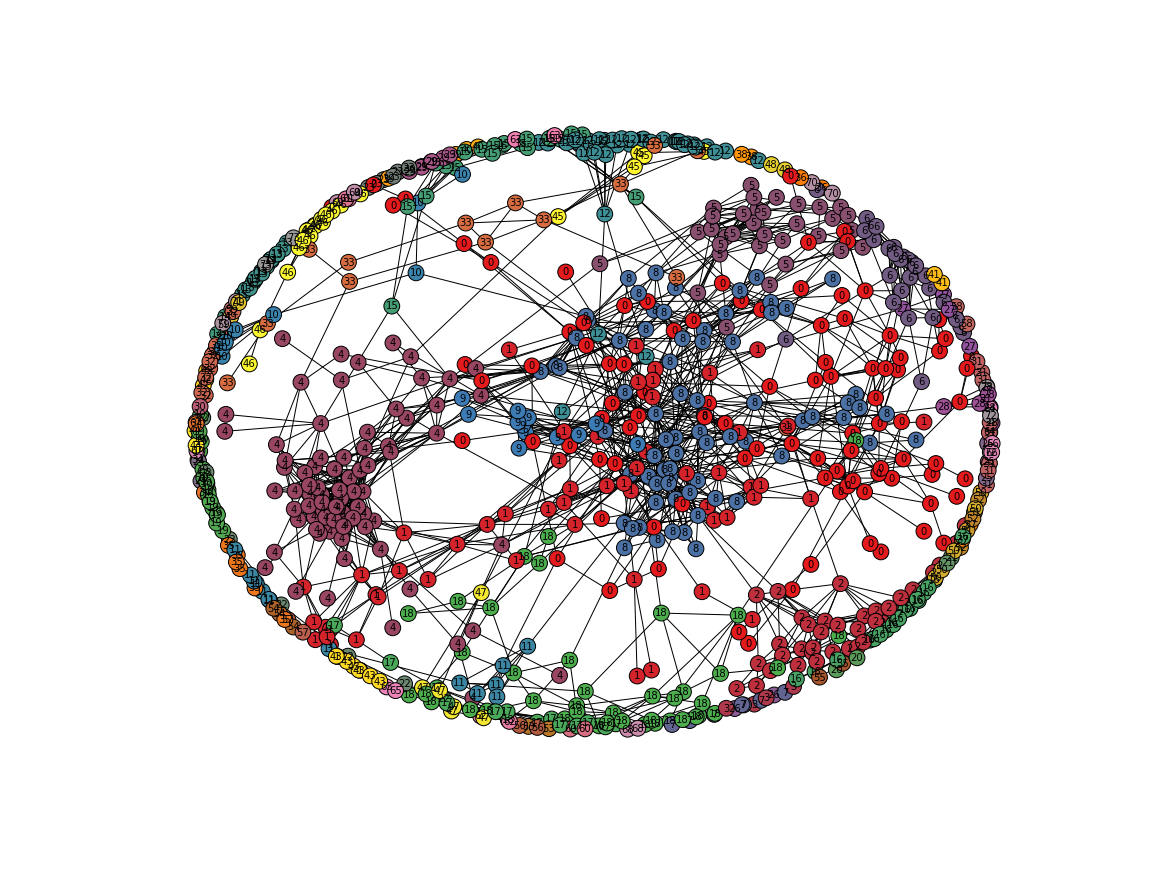

In [94]:
random.seed(2015)
visualizePartition(UG,PC,None)

In [96]:
PL_df = pd.DataFrame({'artist':PC.keys(),
                      'cluster':PC.values()})

In [97]:
counts = PL_df.cluster.value_counts()

In [98]:
counts.describe()

count    74.000000
mean     11.013514
std      18.496570
min       2.000000
25%       2.000000
50%       3.000000
75%       9.750000
max      98.000000
Name: cluster, dtype: float64

### Remix

In [99]:
from api_key import *
import numpy as np
import pandas as pd
import json
import os
import time
import networkx as nx
import scipy.stats as stats
import matplotlib.pyplot as plt 
%matplotlib inline
import echonest.remix.audio as audio
from pyechonest import artist 
from IPython.display import Audio

In [100]:
remix_list = ['Adele', u'Emeli Sande', u'Bruno Mars', u'Jason Der\xfclo', 'Justin Bieber']

In [101]:
songs = ['Adele_-_Hello.mp3',
'Emeli_Sandé_-_My_Kind_Of_Love_(RedOne_and_Alex_P_Remix).mp3',
'Bruno_Mars___Just_The_Way_You_Are___Lyrics_On_Screen_HQ_HD_NEW_SINGLE_2010.mp3',
'Jason_Derulo_-_Want_To_Want_Me_(Official_Video).mp3',
'Justin_Bieber_-_What_Do_You_Mean.mp3']
output = ['songs/test1.mp3', 'songs/test2.mp3', 'songs/test3.mp3', 'songs/test4.mp3', 'songs/test5.mp3']

In [102]:
audiofile0 = audio.LocalAudioFile('songs/'+songs[0])
bars = audiofile0.analysis.bars

['en-ffmpeg', '-i', 'songs/Adele_-_Hello.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmplXb0mB.wav']
Computed MD5 of file is 0ee23f5a5d6395c95a47dccb88b075ef
Probing for existing analysis


In [103]:
out0 = audio.getpieces(audiofile0, bars[20:25])
out0.encode(output[0])
Audio(output[0])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpC13zq1.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/test1.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpC13zq1.wav


In [104]:
audiofile1 = audio.LocalAudioFile('songs/'+songs[1])
bars = audiofile1.analysis.bars

['en-ffmpeg', '-i', 'songs/Emeli_Sande\xcc\x81_-_My_Kind_Of_Love_(RedOne_and_Alex_P_Remix).mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpXatJ8z.wav']
Computed MD5 of file is f58b62ea8fc858689d5d00788912ab1f
Probing for existing analysis


In [105]:
out1 = audio.getpieces(audiofile1, bars[30:35])
out1.encode(output[1])
Audio(output[1])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmptNEMV_.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/test2.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmptNEMV_.wav


In [106]:
audiofile2 = audio.LocalAudioFile('songs/'+songs[2])
bars = audiofile2.analysis.bars

['en-ffmpeg', '-i', 'songs/Bruno_Mars___Just_The_Way_You_Are___Lyrics_On_Screen_HQ_HD_NEW_SINGLE_2010.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpZduRAN.wav']
Computed MD5 of file is db9bfd08156a33fdf85938972d7b17b2
Probing for existing analysis


In [107]:
out2 = audio.getpieces(audiofile2, bars[50:55])
out2.encode(output[2])
Audio(output[2])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpX28kdA.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/test3.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpX28kdA.wav


In [108]:
audiofile3 = audio.LocalAudioFile('songs/'+songs[3])
bars = audiofile3.analysis.bars

['en-ffmpeg', '-i', 'songs/Jason_Derulo_-_Want_To_Want_Me_(Official_Video).mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpeGXNEF.wav']
Computed MD5 of file is bdf325673cfb94fe00c21fbf3a11722a
Probing for existing analysis


107

In [109]:
out3 = audio.getpieces(audiofile3, bars[81:86])
out3.encode(output[3])
Audio(output[3])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmp_7hFMT.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/test4.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmp_7hFMT.wav


In [110]:
audiofile4 = audio.LocalAudioFile('songs/'+songs[4])
bars = audiofile4.analysis.bars
len(bars)

['en-ffmpeg', '-i', 'songs/Justin_Bieber_-_What_Do_You_Mean.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpf9lRYJ.wav']
Computed MD5 of file is f02b0f977adb9fc57bd4c6043434f7cd
Probing for existing analysis


148

In [111]:
out4 = audio.getpieces(audiofile4, bars[130:135])
out4.encode(output[4])
Audio(output[4])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmppGo8Kl.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/test5.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmppGo8Kl.wav


In [113]:
out = out0+out1+out2+out3+out4
out.encode('songs/medley1.mp3')
Audio('songs/medley1.mp3')

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpiL7vfL.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/medley1.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpiL7vfL.wav


In [114]:
new_song = ['Maroon_5_-_Sugar.mp3', 
           'Jason_Mraz_-_Im_Yours.mp3',
           'James_Blunt_-_Youre_Beautiful.mp3',
           'OneRepublic_-_Counting_Stars.mp3']

In [115]:
new_output = ['Maroon_5.mp3','Jason_Mraz.mp3','James_Blunt.mp3','OneRepublic.mp3']

In [116]:
audiofile0 = audio.LocalAudioFile('songs/'+new_song[0])
bars = audiofile0.analysis.bars

['en-ffmpeg', '-i', 'songs/Maroon_5_-_Sugar.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpxhXmk8.wav']
Computed MD5 of file is cab85e9534b405f15ed669264fd6bb51
Probing for existing analysis


In [117]:
out0 = audio.getpieces(audiofile0, bars[20:26])
out0.encode('songs/'+new_output[0])
Audio('songs/'+new_output[0])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmprpA1zo.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/Maroon_5.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmprpA1zo.wav


In [118]:
audiofile1 = audio.LocalAudioFile('songs/'+new_song[1])
bars = audiofile1.analysis.bars

['en-ffmpeg', '-i', 'songs/Jason_Mraz_-_Im_Yours.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpMPKjd2.wav']
Computed MD5 of file is 1b25155c8dbd3787659b880d41fdb6b2
Probing for existing analysis


In [119]:
out1 = audio.getpieces(audiofile1, bars[10:16])
out1.encode('songs/'+new_output[1])
Audio('songs/'+new_output[1])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmp3FXv49.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/Jason_Mraz.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmp3FXv49.wav


In [121]:
audiofile2 = audio.LocalAudioFile('songs/'+new_song[2])
bars = audiofile2.analysis.bars

['en-ffmpeg', '-i', 'songs/James_Blunt_-_Youre_Beautiful.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpgUtAtC.wav']
Computed MD5 of file is 69ea9b2e5ed58863374373286a1ce707
Probing for existing analysis


In [122]:
out2 = audio.getpieces(audiofile2, bars[16:19])
out2.encode('songs/'+new_output[2])
Audio('songs/'+new_output[2])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpcIcyBb.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/James_Blunt.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpcIcyBb.wav


In [123]:
audiofile3 = audio.LocalAudioFile('songs/'+new_song[3])
bars = audiofile3.analysis.bars

['en-ffmpeg', '-i', 'songs/OneRepublic_-_Counting_Stars.mp3', '-y', '-ac', '2', '-ar', '44100', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpZot7_2.wav']
Computed MD5 of file is 25242e27e0aa68ffd38203e3a8a411f8
Probing for existing analysis


In [124]:
out3 = audio.getpieces(audiofile3, bars[124:129])
out3.encode('songs/'+new_output[3])
Audio('songs/'+new_output[3])

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmp12wvBT.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/OneRepublic.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmp12wvBT.wav


In [125]:
pre = out1+out2+out3
pre.encode('songs/medley.mp3')
Audio('songs/medley.mp3')

['en-ffmpeg', '-i', '/var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpIZa5Fj.wav', '-y', '-ab', '128k', '-ac', '2', '-ar', '44100', 'songs/medley.mp3']
Deleting: /var/folders/n0/h_w4nr5975937v38p5sym7c00000gn/T/tmpIZa5Fj.wav
